In [ ]:
import cv2
import tensorflow as tf

# Load the pre-trained model
model = tf.saved_model.load('/content/drive/MyDrive/LSBU/Deep Learning/Deep Learning Model/Image Classification/Final Model/fruit_classification.h5')

# Load the image
image = cv2.imread('path/to/image.jpg')

# Convert the image to RGB (TensorFlow uses RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform inference
input_tensor = tf.convert_to_tensor([image_rgb], dtype=tf.uint8)
detections = model(input_tensor)

# Extract bounding boxes, classes, and scores
boxes = detections['detection_boxes'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(int)
scores = detections['detection_scores'][0].numpy()

# Draw bounding boxes on the image
for i in range(len(boxes)):
    box = boxes[i]
    class_id = classes[i]
    score = scores[i]
    if score > 0.5:  # Adjust the confidence threshold as needed
        ymin, xmin, ymax, xmax = box
        xmin = int(xmin * image.shape[1])
        xmax = int(xmax * image.shape[1])
        ymin = int(ymin * image.shape[0])
        ymax = int(ymax * image.shape[0])
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, f'Class: {class_id}, Score: {score:.2f}', (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Display the result
cv2.imshow('Object Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2

# Load the image
image = cv2.imread('/content/realistic-vector-pictures-of-fresh-fruits-and-vegetables-2BNJXR1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect objects in the image
boxes, weights = hog.detectMultiScale(gray, winStride=(8, 8), padding=(4, 4), scale=1.05)

# Draw bounding boxes on the image
for (x, y, w, h) in boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow('Object Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


DisabledFunctionError: ignored

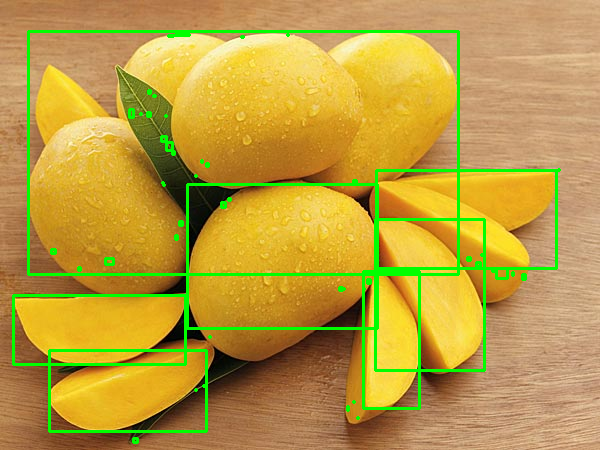

In [9]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/realistic-vector-pictures-of-fresh-fruits-and-vegetables-2BNJXR1.jpg')

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a color range for the object you want to detect (adjust these values)
lower_color = np.array([20, 100, 100])
upper_color = np.array([30, 255, 255])

# Create a mask using the inRange function
mask = cv2.inRange(hsv, lower_color, upper_color)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected objects
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result in Colab
cv2_imshow(image)


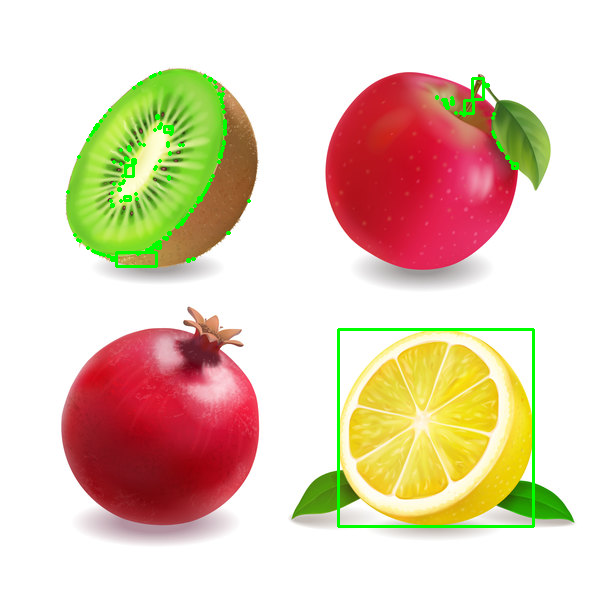

In [12]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

# Load the image
image_path = '/content/4-kind-fruits-illustration-vector.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a color range for the object you want to detect (adjust these values)
lower_color = np.array([20, 100, 100])
upper_color = np.array([30, 255, 255])

# Create a mask using the inRange function
mask = cv2.inRange(hsv, lower_color, upper_color)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a directory to save the detected objects
output_dir = '/content/detected_object'
os.makedirs(output_dir, exist_ok=True)

# Draw bounding boxes around detected objects and save as separate images
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    object_image = image[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Save the detected object as a separate image
    object_filename = f'object_{i+1}.jpg'
    object_path = os.path.join(output_dir, object_filename)
    cv2.imwrite(object_path, object_image)

# Display the result in Colab
cv2_imshow(image)


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/drive/MyDrive/LSBU/Deep Learning/Deep Learning Model/Image Classification/Final Model/fruit_classification.h5'  # Replace with the path to your model file
model = load_model(model_path)

# Load the single test image
img_path = '/content/sssssssssssssss.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array and normalize it
img_array = image.img_to_array(img)
img_array = img_array / 255.0

# Add an extra dimension to match the model's expected input shape
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)

# Get the class index with the highest probability
predicted_class_index = np.argmax(predictions[0])

# # Print the predicted class
# class_names = ['class_1', 'class_2', 'class_3', ...]  # Replace with your class names
# predicted_class = class_names[predicted_class_index]

print(f'The model predicts: {predicted_class}')


1/1 [==============================] - 1s 535ms/step
The model predicts: class_3


In [26]:
predicted_class_index

7